In [3]:
def lfsr(seed, taps, length):
    """
    Implements a simple Linear Feedback Shift Register (LFSR).
    
    :param seed: A list representing the initial state of the register (initial seed).
    :param taps: A list of positions to be XOR'ed for the feedback.
    :param length: The length of the key stream to generate.
    :return: The generated key stream.
    """
    register = seed[:]  # Copy the seed to avoid modifying the original
    key_stream = []
    
    print(f"Initial state: {register}")
    
    for i in range(length):
        # XOR the bits at the positions specified in the 'taps' list
        new_bit = 0
        for tap in taps:
            new_bit ^= register[tap]
        
        # Shift the register to the left and insert the new bit at the end
        register = [new_bit] + register[:-1]
        
        # Append the new bit to the key stream
        key_stream.append(register[-1])  # appending the last bit generated

        print(f"Iteration {i+1}: Register = {register}, New bit = {new_bit}")

    return key_stream


# Example usage:
# Seed: initial values in the LFSR
# Taps: which bits to XOR (S_0 and S_3 in this case, corresponding to positions 0 and 3)
# Length: how many bits of key stream we want to generate

seed = [1, 0, 0, 1]  # Example seed (initial register state)
taps = [0, 3]  # We will XOR S_0 and S_3 as per the equation S_4 = S_0 XOR S_3
length = 10  # Generate 10 bits in the key stream

key_stream = lfsr(seed, taps, length)
print(f"Generated key stream: {key_stream}")


Initial state: [1, 0, 0, 1]
Iteration 1: Register = [0, 1, 0, 0], New bit = 0
Iteration 2: Register = [0, 0, 1, 0], New bit = 0
Iteration 3: Register = [0, 0, 0, 1], New bit = 0
Iteration 4: Register = [1, 0, 0, 0], New bit = 1
Iteration 5: Register = [1, 1, 0, 0], New bit = 1
Iteration 6: Register = [1, 1, 1, 0], New bit = 1
Iteration 7: Register = [1, 1, 1, 1], New bit = 1
Iteration 8: Register = [0, 1, 1, 1], New bit = 0
Iteration 9: Register = [1, 0, 1, 1], New bit = 1
Iteration 10: Register = [0, 1, 0, 1], New bit = 0
Generated key stream: [0, 0, 1, 0, 0, 0, 1, 1, 1, 1]


In [4]:
def lfsr_with_var_names(seed, taps, length):
    """
    Implements a simple Linear Feedback Shift Register (LFSR) with detailed variable names printed.
    
    :param seed: A list representing the initial state of the register (initial seed).
    :param taps: A list of positions to be XOR'ed for the feedback.
    :param length: The length of the key stream to generate.
    :return: The generated key stream.
    """
    register = seed[:]  # Copy the seed to avoid modifying the original
    key_stream = []

    print(f"Initial state: s0, s1, s2, s3 = {register}")
    
    for i in range(length):
        # XOR the bits at the positions specified in the 'taps' list
        new_bit = 0
        for tap in taps:
            new_bit ^= register[tap]
            print(f"e_{i+1} ^= s{tap} -> e_{i+1} = {new_bit}")

        # Shift the register to the left and insert the new bit at the end
        print(f"Generated e_{i+1} = {new_bit}")
        register = [new_bit] + register[:-1]
        print(f"New state: s0, s1, s2, s3 = {register}")

        # Append the new bit to the key stream
        key_stream.append(register[-1])  # appending the last bit generated
        print(f"Key stream so far: {key_stream}\n")

    return key_stream


# Example usage:
seed = [0, 1, 1, 1]  # Initial seed (corresponding to the example in the image)
taps = [0, 3]  # XOR taps for generating the feedback (S0 and S3)
length = 10  # Length of key stream to generate

key_stream = lfsr_with_var_names(seed, taps, length)
print(f"Generated key stream: {key_stream}")


Initial state: s0, s1, s2, s3 = [0, 1, 1, 1]
e_1 ^= s0 -> e_1 = 0
e_1 ^= s3 -> e_1 = 1
Generated e_1 = 1
New state: s0, s1, s2, s3 = [1, 0, 1, 1]
Key stream so far: [1]

e_2 ^= s0 -> e_2 = 1
e_2 ^= s3 -> e_2 = 0
Generated e_2 = 0
New state: s0, s1, s2, s3 = [0, 1, 0, 1]
Key stream so far: [1, 1]

e_3 ^= s0 -> e_3 = 0
e_3 ^= s3 -> e_3 = 1
Generated e_3 = 1
New state: s0, s1, s2, s3 = [1, 0, 1, 0]
Key stream so far: [1, 1, 0]

e_4 ^= s0 -> e_4 = 1
e_4 ^= s3 -> e_4 = 1
Generated e_4 = 1
New state: s0, s1, s2, s3 = [1, 1, 0, 1]
Key stream so far: [1, 1, 0, 1]

e_5 ^= s0 -> e_5 = 1
e_5 ^= s3 -> e_5 = 0
Generated e_5 = 0
New state: s0, s1, s2, s3 = [0, 1, 1, 0]
Key stream so far: [1, 1, 0, 1, 0]

e_6 ^= s0 -> e_6 = 0
e_6 ^= s3 -> e_6 = 0
Generated e_6 = 0
New state: s0, s1, s2, s3 = [0, 0, 1, 1]
Key stream so far: [1, 1, 0, 1, 0, 1]

e_7 ^= s0 -> e_7 = 0
e_7 ^= s3 -> e_7 = 1
Generated e_7 = 1
New state: s0, s1, s2, s3 = [1, 0, 0, 1]
Key stream so far: [1, 1, 0, 1, 0, 1, 1]

e_8 ^= s0 -> e_8 

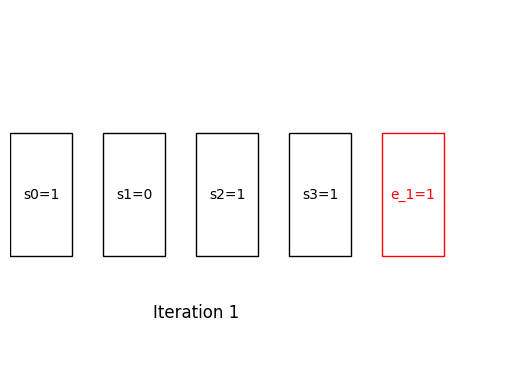

Generated key stream: [1, 0, 1, 1, 0, 0, 1, 0, 0, 0]


In [7]:
!pip install numpy matplotlib
import matplotlib.pyplot as plt
import numpy as np

def visualize_lfsr(seed, taps, length):
    register = seed[:]
    key_stream = []

    fig, ax = plt.subplots()
    
    def draw_register(register, iteration, new_bit):
        ax.clear()
        ax.set_xlim(0, 8)
        ax.set_ylim(-1, 2)
        ax.set_axis_off()

        # Draw shift register boxes
        for i in range(len(register)):
            ax.add_patch(plt.Rectangle((i * 1.5, 0), 1, 1, fill=None, edgecolor='black'))
            ax.text(i * 1.5 + 0.5, 0.5, f"s{i}={register[i]}", horizontalalignment='center', verticalalignment='center')

        # Draw new bit coming in
        ax.add_patch(plt.Rectangle((len(register) * 1.5, 0), 1, 1, fill=None, edgecolor='red'))
        ax.text(len(register) * 1.5 + 0.5, 0.5, f"e_{iteration}={new_bit}", horizontalalignment='center', verticalalignment='center', color='red')

        ax.text(3, -0.5, f"Iteration {iteration}", fontsize=12, horizontalalignment='center')

        plt.pause(0.5)

    for i in range(length):
        new_bit = 0
        for tap in taps:
            new_bit ^= register[tap]

        key_stream.append(new_bit)
        register = [new_bit] + register[:-1]

        draw_register(register, i + 1, new_bit)

    plt.show()
    return key_stream

# Example usage:
seed = [0, 1, 1, 1]  # Initial state
taps = [0, 3]  # XOR taps (e.g., positions s0 and s3)
length = 10  # Length of key stream to generate

key_stream = visualize_lfsr(seed, taps, length)
print(f"Generated key stream: {key_stream}")
